In [1]:
from RL import Bandits

# Initialize bandit problem with 10 arms and normal distribution over arm true rewards.

In [2]:
bandit = Bandits(num_arms=10, mu=0, sigma=1)

# Simulating e-greedy, greedy, softmax, and ucb strategies and plotting results comparing.

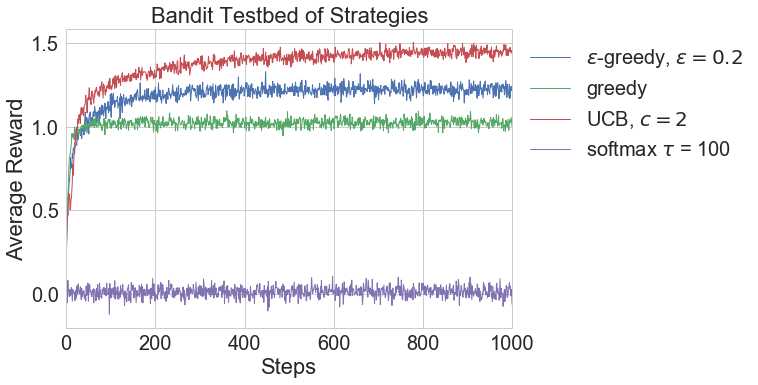

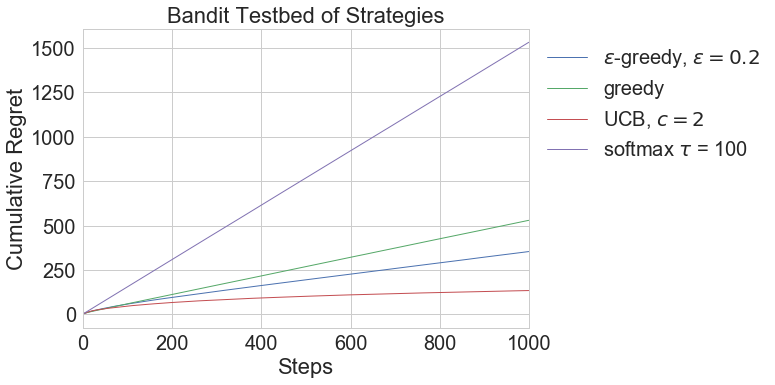

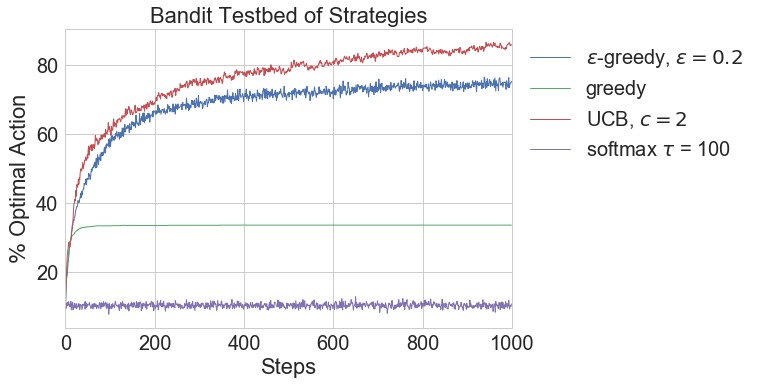

In [4]:
# Initializing figures to plot average rewards, cumulative regret, and optimal action percentage.
bandit.initialize_figs(reward=True, regret=True, optimal=True)

# Simulate bandit problem with epsilon greedy strategy and plot values but do not show yet.
bandit.simulate(policy_strategy='e-greedy', epsilon=.2, epsilon_decay=False)
bandit.plot_average_reward()
bandit.plot_cumulative_regret()
bandit.plot_average_optimal()

# Simulate bandit problem with greedy strategy and plot values but do not show yet.
bandit.simulate(policy_strategy='greedy')
bandit.plot_average_reward()
bandit.plot_cumulative_regret()
bandit.plot_average_optimal()

# Simulate bandit problem with softmax and plot values but do not show yet.
bandit.simulate(policy_strategy='softmax', tau=100, tau_decay=False)
bandit.plot_average_reward()
bandit.plot_cumulative_regret()
bandit.plot_average_optimal()

# Simulate bandit problem with ucb strategy and plot values but do not show yet.
bandit.simulate(policy_strategy='ucb')
bandit.plot_average_reward()
bandit.plot_cumulative_regret()
bandit.plot_average_optimal()

# Show and save figures with results comparing algorithms.
bandit.save_and_show_figs(save_figs=True, show_figs=True)